# Exploratory Data Analysis of the Movie Review Dataset.

## Description

Explore the nuances and quality of the movie review dataset in order to inform model development.

## Table of Contents

In [20]:
from utils.data import download_data, get_data_as_csv
from utils.preprocessing import clean_text
from utils.plotting import plot_review_length_dist, plot_review_length_dist_by_sentiment, plot_pos_tag_breakdown, plot_quick_word_frequencies, plot_top_adjectives_and_preview_noun_chunks

In [6]:
# download dataset
#download_data("https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")

In [ ]:
# read in training data
df_reviews = get_data_as_csv()

INFO:root:Reading data into pandas DataFrame
INFO:root:Read complete


In [8]:
# print opening lines
df_reviews.head()

,review,sentiment
0,This is a really interesting movie. It is an a...,pos
1,'Stanley and Iris' show the triumph of the hum...,pos
2,Thelma Ritter did steal the picture. I just fi...,pos
3,Although John Woo's hard Boiled is my number 1...,pos
4,This period melodrama is one of Griffith's ear...,pos


In [9]:
# Some reviews contain html tags
df_reviews['review'][300]

'I don\'t know whether to recommend this movie to the fans of " Tetsuo " or not . Why " Tetsuo " ? Because you can easily label some things about this movie as a very obvious " Tetsuo " rip - off . The concept is similar , editing is equally frantic and fast - which is good because , aside from making the movie more dynamic , it obscures some flaws caused by low budget and other factors .<br /><br />There is lot more gore , less eroticism and , in the case of " Meatball machine " , the transformation of human being into a creature that\'s partially a machine( sounds familiar ? ) called " Necroborg " ( very original ) is caused by slimy little aliens .<br /><br />These slimy little scums from outer space actually use human beings as vessels for their gladiator games that they play with each other . They infest the body , somehow manage to put an insane amount of mechanical parts in it pulling them seemingly out of nowhere and turn it into a killing machine that targets other Necroborgs 

In [10]:
clean_text(df_reviews['review'][300])

'I don\'t know whether to recommend this movie to the fans of " Tetsuo " or not . Why " Tetsuo " ? Because you can easily label some things about this movie as a very obvious " Tetsuo " rip - off . The concept is similar , editing is equally frantic and fast - which is good because , aside from making the movie more dynamic , it obscures some flaws caused by low budget and other factors .There is lot more gore , less eroticism and , in the case of " Meatball machine " , the transformation of human being into a creature that\'s partially a machine( sounds familiar ? ) called " Necroborg " ( very original ) is caused by slimy little aliens .These slimy little scums from outer space actually use human beings as vessels for their gladiator games that they play with each other . They infest the body , somehow manage to put an insane amount of mechanical parts in it pulling them seemingly out of nowhere and turn it into a killing machine that targets other Necroborgs . Their aim is to defeat

In [11]:
expected_n = 25000
if df_reviews.shape[0] == expected_n:
    print("We have loaded the expected number of reviews.")

We have loaded the expected number of reviews.


In [12]:
# inspect a couple of reviews
df_reviews['review'].sample(1).to_string()

'19325    As a great admirer of Marlene Dietrich, I had ...'

In [13]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Length of reviews 

If we measure reviews by the number of words, we see the majority cluster between 100 and 250 which should provide a reasonable amount of text to model. We do however see a long tail. The longer the review, the more risk there might be more mixed good and bad statements in a single review. With more nuance comes more ambiguity for a model to deal with potentially. On one hand, it might be possible to find the most impactful statements associated with the labelled sentiment but that isn't guarrenteed. 

It would be wise to evaluate model performance against the review lengths.

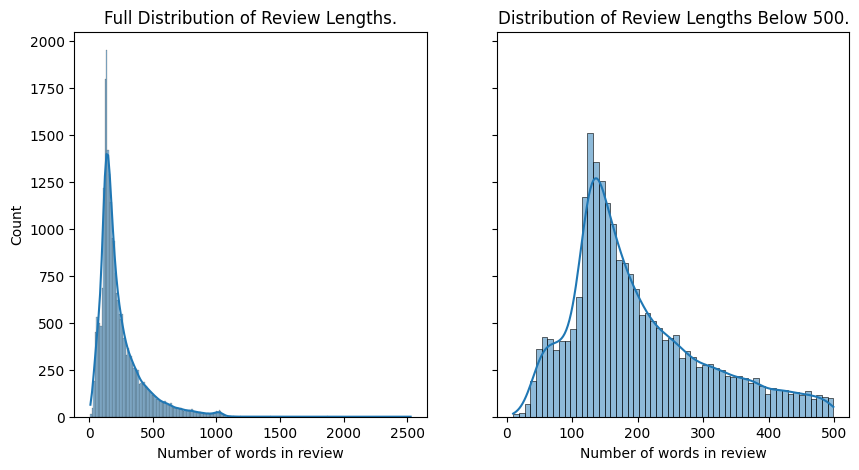

In [14]:
plot_review_length_dist(df_reviews)

#### User segments based on length
The length may also be a good discriminator between different types of users. 
- Do users write longer reviews because they are deeply engaged by cinema? Maybe they are working in or students of film. 
- Perhaps they only write long reviews for their faviorite or most controversial films.

When we compare distributions they seem well balanced with just a few outliers in the tail of positive reviews. This could be down to selection bias from the authors to make modelling easier but we can't be sure.

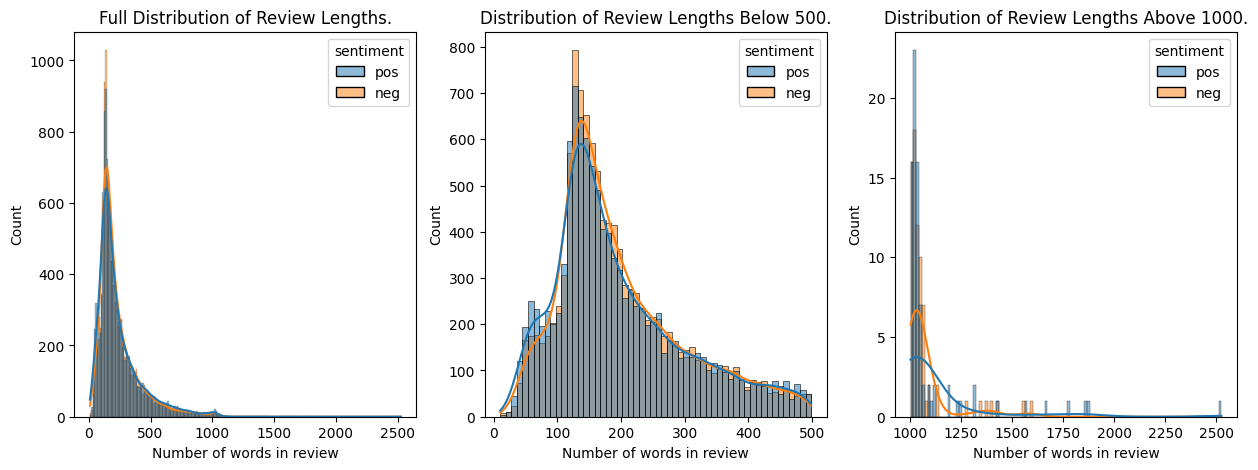

In [15]:
plot_review_length_dist_by_sentiment(df_reviews)

## Most frequent words

If we do a quick inspection of the most frequent words, we gain very little information. We can see there may be some data cleaning required if we use a bag-of-words approach for training features.

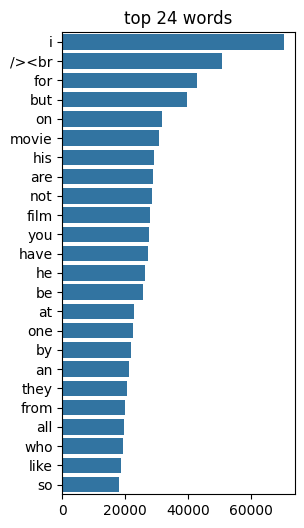

In [16]:
plot_quick_word_frequencies(df_reviews, 'review')

## Grammar Analysis (Parts-of-speech)

If we breakdown the text by parts-of-speech tags, such as nouns, verbs, adjectives, we can see some differences with other types of text. If we compare with news articles, we can see fewer nouns and pronouns as a proportion. Our expectation might be that adjectives might be more important when it comes to our sentiment task anyway. Though, we can see the opinions of our movie reviews may have some important characteristic differences.

Figure 3 & 4 give us a picture of how unique some of the words are in our movie dataset vs. the comparison news articles. There appears to be more diversity in the news dataset, which may give us an advantage in a couple of ways. Firstly, lower token diversity might allow us to build a smaller and more streamlined model with lower risk of seeing drastically different language when making predictions on new data. Secondly, we might expect more overlap between reviews based on similar language, which might mean a model will have an easier job finding useful patterns for prediction. On the other hand, too much homogeneity of vocab might also cause misclassifications. 

- `en_core_web_sm` space model used for pat-of-speech tagging.
- Random sample of `100` reviews vs. `10` news articles. (rough judgment based on document length)
- Comparison dataset from huggingface archive: `fancyzhx/ag_news/` which includes more than 1m news articles from 2000 sources.
- Tokens were lemmetized before comparing unique words for figures 3 & 4.


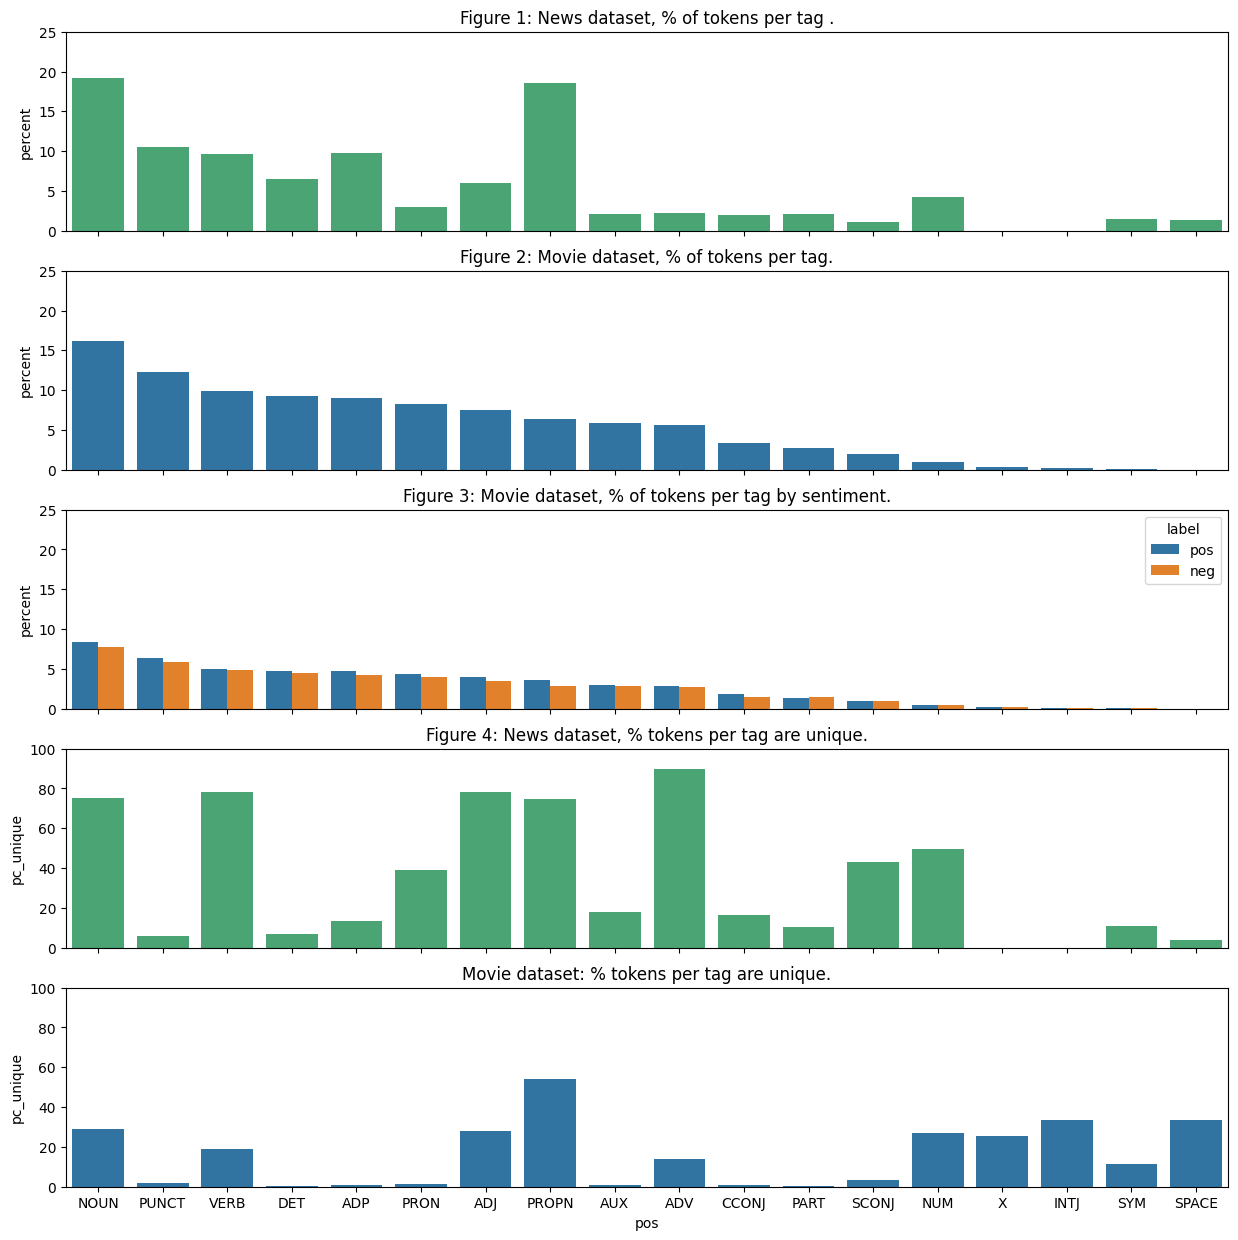

In [17]:
plot_pos_tag_breakdown(df_reviews)

### Inspection

If we view phrases that contain a noun, unsuprisingly we see a lot of movie specific content. These might not be particularly useful on paper for sentiment, however a model might find shortcuts if certain nouns regularly refer to a particular sentiment. We should watch out for this in our evaluation and try to adjust for it as best we can.

Adjectives might be the most important for our sentiment task on paper and reviewing the top 20 we can see some that might be strong indicators. They do tend to look more positive on first glance, so perhaps negative reviews are more nuanced? Or perhaps reviewers tend to highlight the positive aspects to make their negative review sound more fair?

20 noun chunks from sample reviews:
[Karisma Kapoor, Tiku Talsania, Jaspal Bhatti, Sanjay Kapoor, Master Jai Gidwani, Deepti Naval)makes, Nana Patekar, Deepti Naval, ruthless killing, Ismail Darbar, Ishq Kameena, Anu Malik, Karisma Kapoor, actor Nana Patekar, Sanjay Kapoor, Deepti Naval, original ideas, good acting, bad Zombie effects, horror fans]


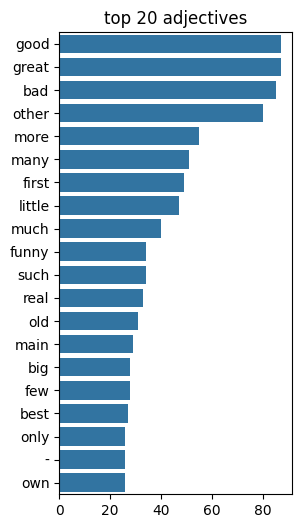

In [21]:
plot_top_adjectives_and_preview_noun_chunks(df=df_reviews, text_col='review')